Project 4

In [2]:
import matplotlib as plt
import pandas as pd

In [3]:
df = pd.read_csv('vehicles_us.csv')
#Checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The "is_4wd" column has values of 1 or NaN. Safe to conclude that NaN meant "no." Therefore I'll replace them with zeros. 

In [4]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'] = df['is_4wd'].astype('int')
#no need for the values to be floats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  int64  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [5]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2621,13500,2019.0,honda civic,excellent,4.0,gas,7500.0,automatic,hatchback,grey,0,2019-04-10,54
50307,5900,2006.0,ford f-150,good,NaN,gas,225000.0,automatic,pickup,white,1,2018-06-02,35
43397,14237,2011.0,ford f-150,excellent,6.0,gas,NaN,automatic,truck,white,0,2018-07-26,28
22129,12500,2013.0,volkswagen passat,excellent,NaN,diesel,52573.0,automatic,sedan,NaN,0,2019-01-20,14
16051,6596,2012.0,ford fusion,good,4.0,gas,91868.0,automatic,sedan,silver,0,2018-08-09,95
39766,5900,NaN,toyota prius,excellent,4.0,hybrid,51500.0,automatic,hatchback,silver,0,2018-10-13,12
31076,3800,NaN,toyota camry le,good,4.0,gas,129000.0,automatic,sedan,silver,0,2019-01-17,59
20136,2800,2003.0,ford taurus,good,6.0,gas,131000.0,automatic,sedan,red,0,2019-01-16,12
33159,8700,2012.0,honda civic,excellent,4.0,gas,82282.0,automatic,sedan,grey,0,2018-08-11,82
26522,3500,2006.0,chevrolet suburban,good,8.0,gas,250000.0,automatic,other,black,1,2019-01-03,66


Converting the "date_posted" to a datetime type for possible future convenience

In [6]:
df['date_posted'] = pd.to_datetime(df['date_posted'] ,format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


It is not fair to say any of the missing values take away the relevance of any vehicle on the list. Therefore, to keep all vehicles, each missing value will be replaced with "not specified"

In [7]:
df['model_year'] = df['model_year'].fillna("not specified")
df['paint_color'] = df['paint_color'].fillna("not specified")
df['odometer'] = df['odometer'].fillna("not specified")
df['cylinders'] = df['cylinders'].fillna("not specified")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  object        
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  object        
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  object        
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 5.1+ MB


Now that all the types are changed and the missing values are replaced, I shall begin analysis

I would like to begin by creating histograms of prices given a type of vehicle. This is for people who are in the market for a particular type of vehicle and want to know where most prices are.

<Axes: title={'center': 'Type of Vehicle Price Availability'}, ylabel='Frequency'>

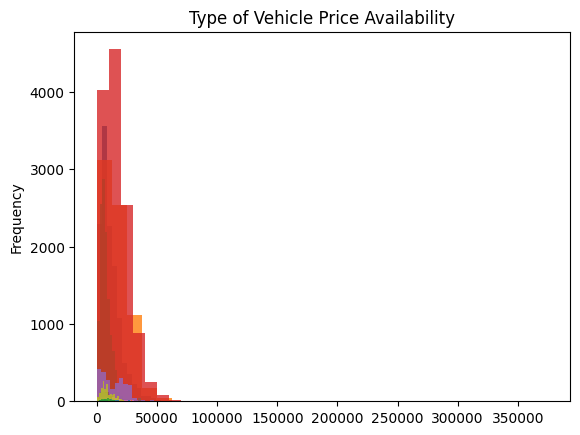

In [8]:
df_suv = df[df['type'] == 'SUV']
df_pickup = df[df['type'] == 'pickup']
df_sedan = df[df['type'] == 'sedan']
df_truck = df[df['type'] == 'truck']
df_coupe = df[df['type'] == 'coupe']
df_van = df[df['type'] == 'van']
df_convertible = df[df['type'] == 'convertible']
df_hatchback = df[df['type'] == 'hatchback']
df_wagon = df[df['type'] == 'wagon']
df_minivan = df[df['type'] == 'mini_van']
df_offroad = df[df['type'] == 'offroad']
df_bus = df[df['type'] == 'bus']
df_type_other = df[df['type'] == 'other']

df_suv['price'].plot(kind='hist', bins=30, title='Type of Vehicle Price Availability', xlabel='Price')
df_pickup['price'].plot(kind='hist', bins=30, alpha=0.8)
df_sedan['price'].plot(kind='hist', bins=30, alpha=0.8)
df_truck['price'].plot(kind='hist', bins=30, alpha=0.8)
df_coupe['price'].plot(kind='hist', bins=30, alpha=0.8)
df_van['price'].plot(kind='hist', bins=30, alpha=0.8)
df_convertible['price'].plot(kind='hist', bins=30, alpha=0.8)
df_hatchback['price'].plot(kind='hist', bins=30, alpha=0.8)
df_wagon['price'].plot(kind='hist', bins=30, alpha=0.8)
df_minivan['price'].plot(kind='hist', bins=30, alpha=0.8)
df_offroad['price'].plot(kind='hist', bins=30, alpha=0.8)
df_bus['price'].plot(kind='hist', bins=30, alpha=0.8)
df_type_other['price'].plot(kind='hist', bins=30, alpha=0.8)
#plt.legend(['SUV','Pickup','Sedan','Truck','Coupe','Van','Convertible','Hatchback','Wagon','Mini Van','Offroad','Bus','Other'])

Next I will make a bar graph of the availability of cars by their color

<Axes: title={'center': 'Color Availability'}, xlabel='paint_color', ylabel='Count'>

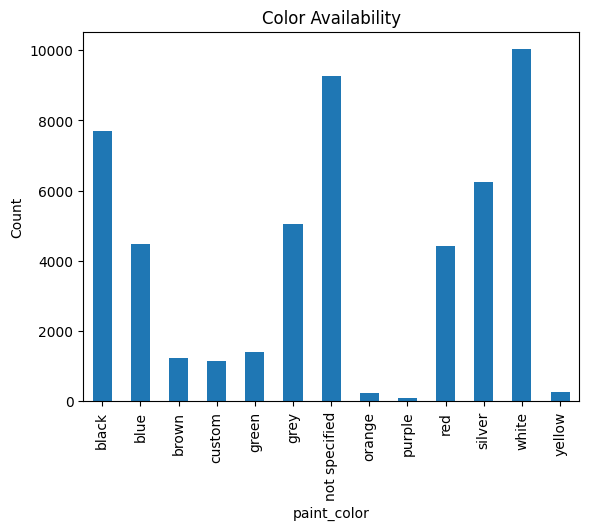

In [9]:
df.groupby('paint_color')['price'].count().plot(kind='bar', title='Color Availability', x='paint_color', ylabel= "Count")

Lastly, I'll make a bar graph of how many vehicles are available by their types

<Axes: title={'center': 'Vehicle Type Availability'}, xlabel='type', ylabel='Count'>

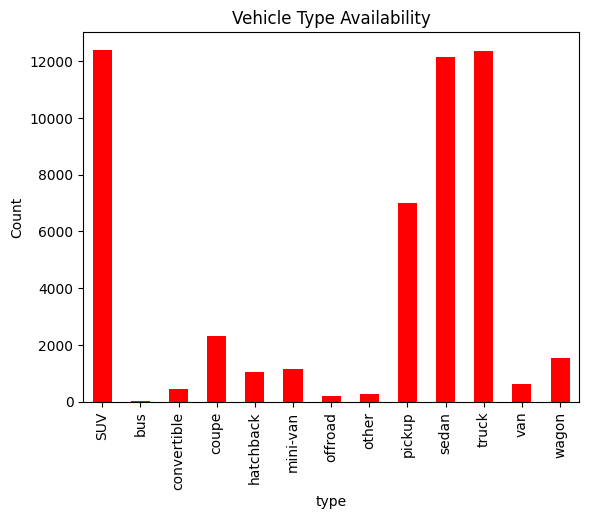

In [10]:
df.groupby("type")['price'].count().plot(kind='bar', title='Vehicle Type Availability', x='type', ylabel='Count', color='red')

<Axes: title={'center': 'Odometer vs Price'}, xlabel='Miles', ylabel='price'>

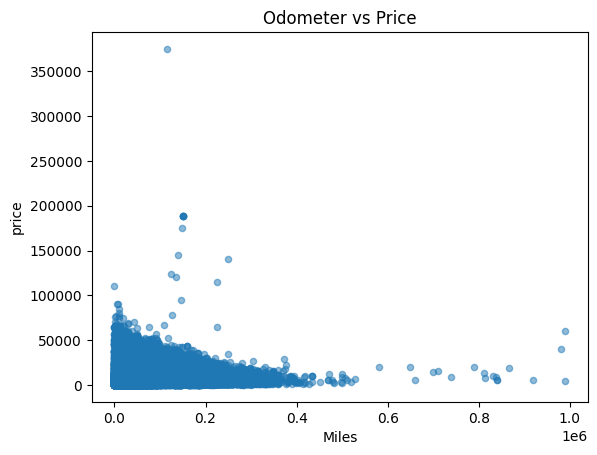

In [11]:
df_proper_odo = df[df['odometer'] != 'not specified']
odo_price_scat = df_proper_odo.loc[:,['odometer','price']].plot(kind='scatter', title='Odometer vs Price', x='odometer', xlabel='Miles', y='price', alpha=0.5)
odo_price_scat